## Import Libraries 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [25]:
pip show scikit-learn imbalanced-learn

Name: scikit-learn
Version: 1.7.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, Boruta, category_encoders, cesium, eli5, fastai, hdbscan, hep_ml, imbalanced-learn, librosa, lime, mlxtend, nilearn, pyLDAvis, pynndescent, rgf-python, scikit-learn-intelex, scikit-optimize, scikit-plot, sentence-transformers, shap, sklearn-compat, sklearn-pandas, TPOT, tsfresh, umap-learn, woodwork, yellowbrick
---
Name: imbalanced-learn
Version: 0.14.0
Summary: Toolbox for imbalanced dataset in machine learning
Home-page: https://imbalanced-learn.org/
Author: 
Author-email: "G. Lemaitre" <g.lemaitre58@gmail.com>, "C. Aridas" <ichkoar@gmail.com>
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 
Note: y

In [26]:
pip install --upgrade scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [27]:
from imblearn.over_sampling import SMOTE

## Read the data

In [28]:
df = pd.read_csv("/kaggle/input/loannnn/loan_approval_dataset.csv")
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [30]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [31]:
df.shape

(4269, 13)

In [32]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [33]:
df.isnull().sum()


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [34]:
df = df.drop(columns=["loan_id"])


## Heatmap to see the correlations in the features

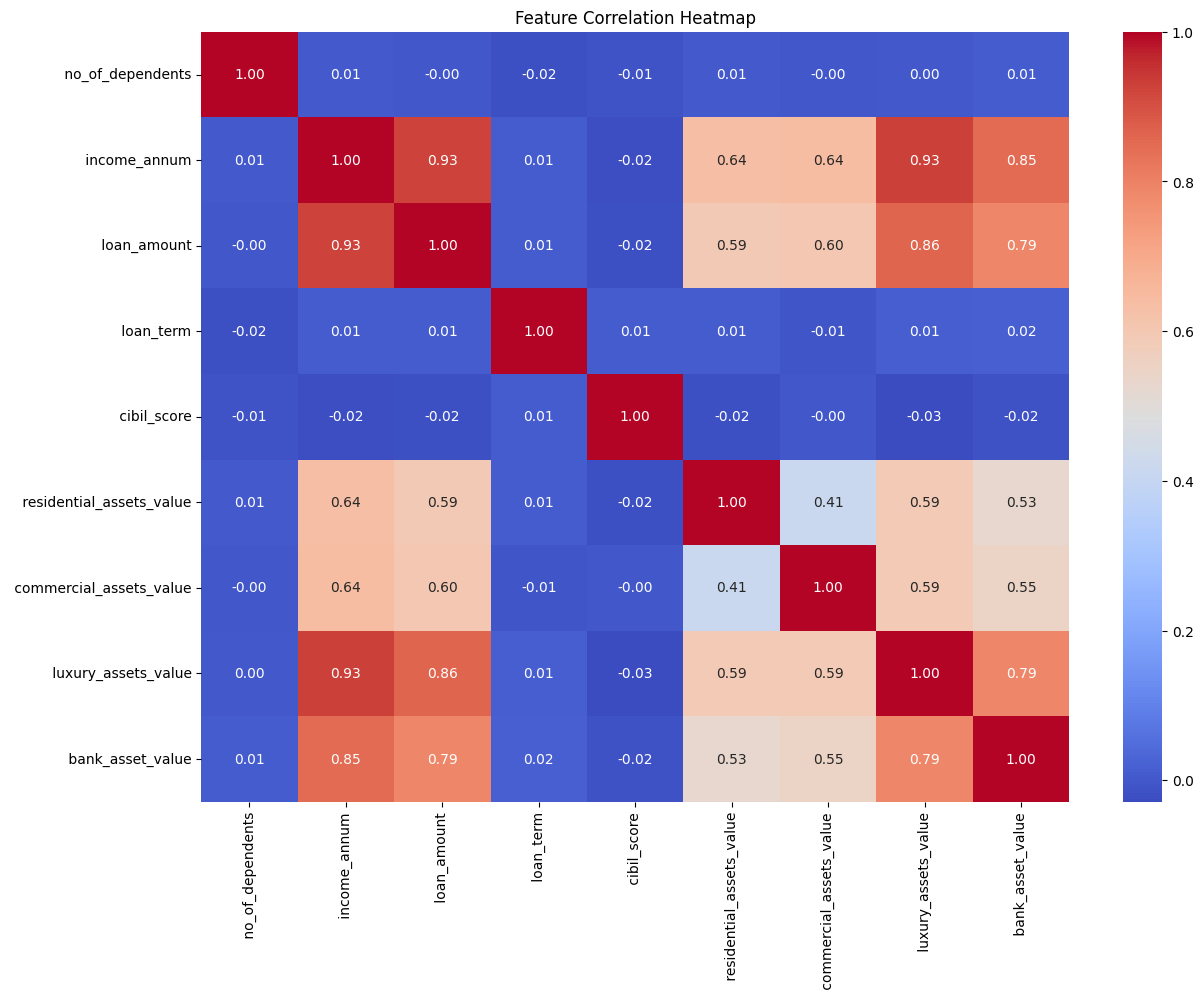

In [35]:
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()
     

## More visualizing 

In [36]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical columns:", numerical_cols)

Numerical columns: [' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


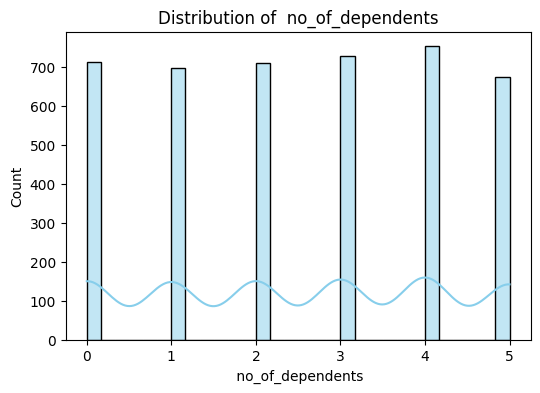

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


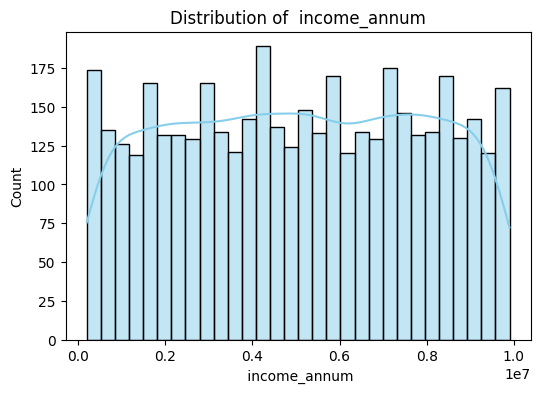

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


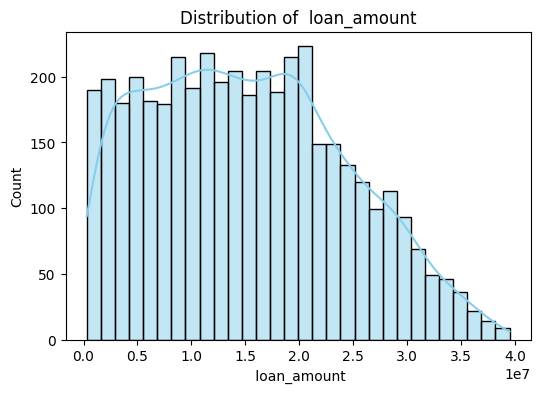

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


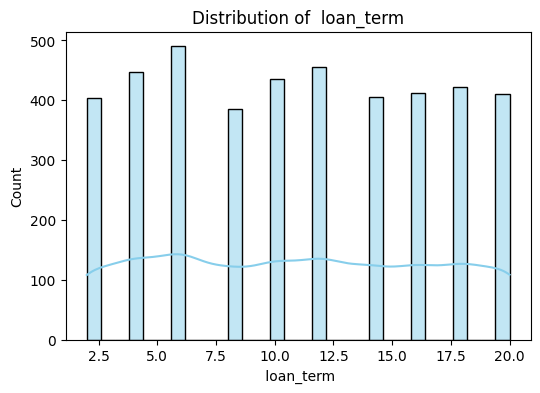

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


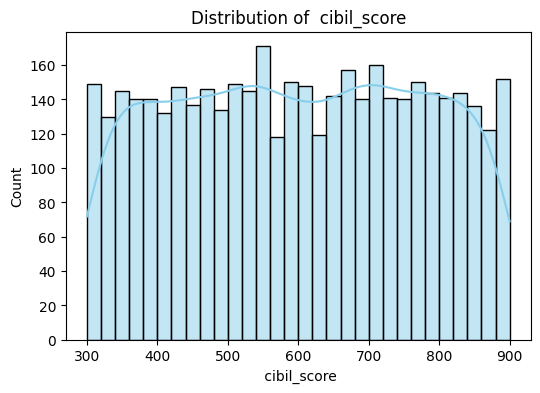

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


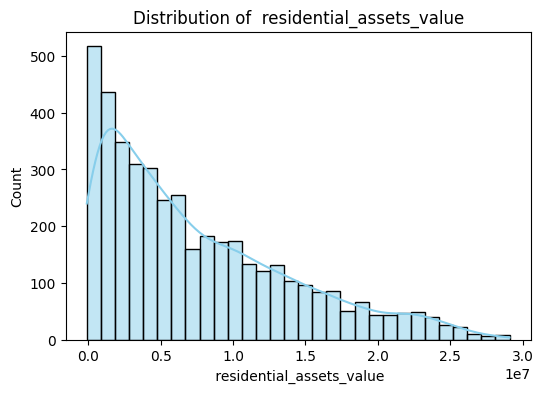

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


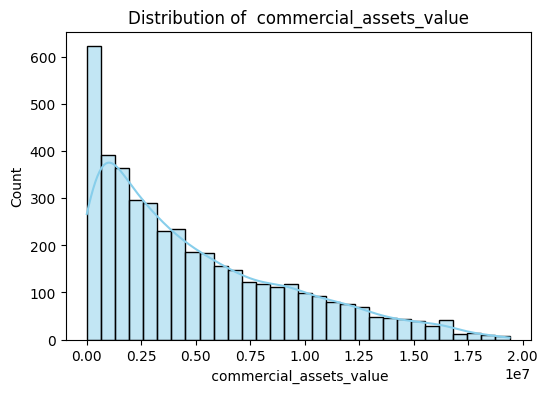

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


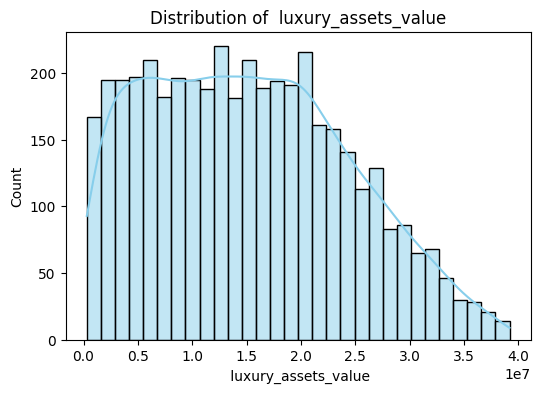

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


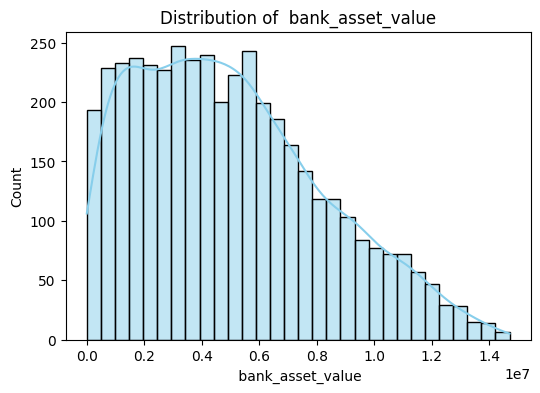

In [37]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.show()

In [38]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

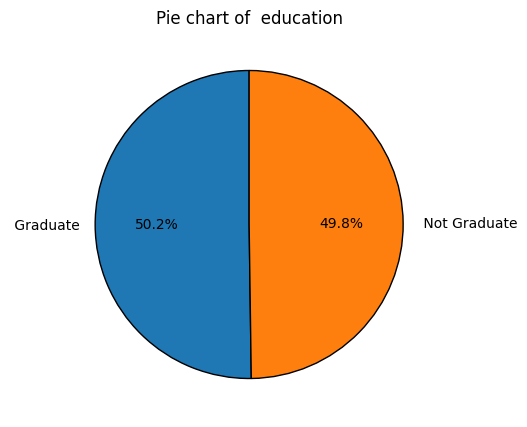

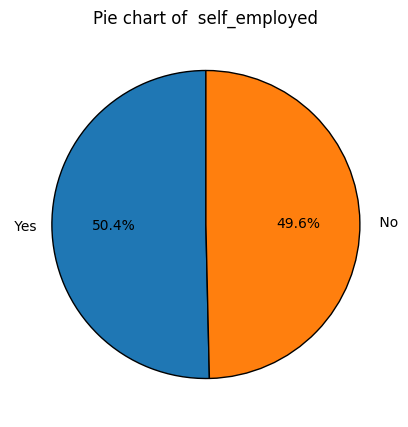

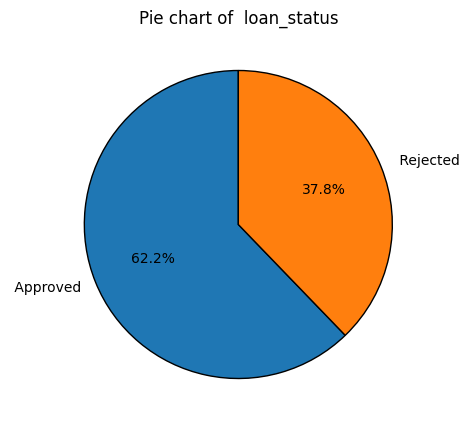

In [39]:
for col in categorical_cols:
    plt.figure(figsize=(5,5))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,
                                    wedgeprops={'edgecolor': 'black'})
    plt.title(f"Pie chart of {col}")
    plt.ylabel("")
    plt.show()

## Label encoding for my categorical columns

In [14]:
encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = encoder.fit_transform(df[column])

print("\nData after encoding:")
print(df.head())


Data after encoding:
   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          0              0       9600000     29900000   
1                 0          1              1       4100000     12200000   
2                 3          0              0       9100000     29700000   
3                 3          0              0       8200000     30700000   
4                 5          1              1       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value

In [15]:
from sklearn.model_selection import train_test_split
df.columns = df.columns.str.strip()

X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Training the model 

In [18]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors = 6),
    "Decision Tree": DecisionTreeClassifier(criterion='gini',max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=150, criterion='gini',max_depth=7),
    }

results = {}
for name, model in models.items():
        model.fit(X_train, y_train)
        y_predtrain = model.predict(X_train)
        y_predtest = model.predict(X_test)
        acctest = accuracy_score(y_test, y_predtest)
        acctrain = accuracy_score(y_train, y_predtrain)
        results[name] = acctest
        print(f"\n🔹 {name}")
        print(f"Accuracy Train: {acctrain:.4f}")
        print(f"Accuracy Test: {acctest:.4f}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_predtest))
        print("Classification Report:")
        print(classification_report(y_test, y_predtest))


🔹 Logistic Regression
Accuracy Train: 0.7906
Accuracy Test: 0.8080
Confusion Matrix:
[[488  43]
 [121 202]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       531
           1       0.82      0.63      0.71       323

    accuracy                           0.81       854
   macro avg       0.81      0.77      0.78       854
weighted avg       0.81      0.81      0.80       854


🔹 KNN
Accuracy Train: 0.6928
Accuracy Test: 0.5831
Confusion Matrix:
[[455  76]
 [280  43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72       531
           1       0.36      0.13      0.19       323

    accuracy                           0.58       854
   macro avg       0.49      0.50      0.46       854
weighted avg       0.52      0.58      0.52       854


🔹 Decision Tree
Accuracy Train: 0.9728
Accuracy Test: 0.9766
Confusion Matrix:
[[514  17]
 [  3 3

## Comparing Model Accuracies

To visually compare model performance, we plot a bar chart of test accuracies for all models.
This helps us quickly identify which algorithm performs the best on the loan approval dataset.

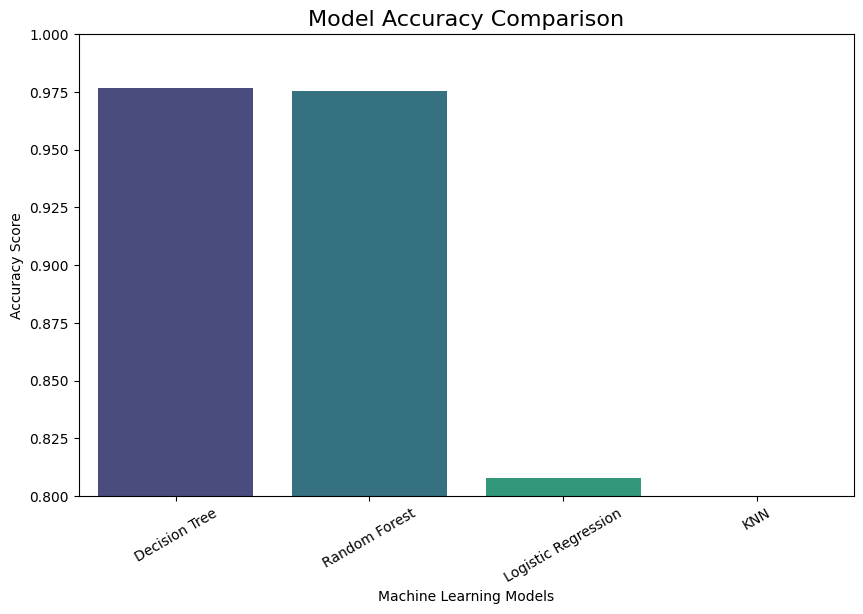

In [19]:
# Convert results dictionary to DataFrame for easier plotting
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

# Sort models by accuracy (optional)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy Score")
plt.xlabel("Machine Learning Models")
plt.ylim(0.8,1)   # y-axis starts from 0.8
plt.xticks(rotation=30)
plt.show()